# Introduction

    The purpose of this project is to use NBA statistics from 1950-2017 to predict NBA player's salary.
    
    We will determine which players are being underpaid, and which players are being overpaid.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()

In [2]:
# Import Data from https://www.kaggle.com/whitefero/nba-players-advanced-season-stats-19782016?select=NBA+Players+-+Advanced+Season+Stats+%281978-2016%29.xlsx
df_1950_2017 = pd.read_csv('1950-2017NBAStats.csv').drop(['#','blanl','blank2'],axis = 1)[:-1]
df_salary_cap = pd.read_csv('NBASalaryCapData.csv')
df_win_tots = pd.read_csv('NBAWinTotals.csv')


In [3]:
df_1950_2017['Season Start'] = df_1950_2017['Season Start'].astype(int)

In [4]:
# Remove null values
df_win_tots.dropna(inplace = True)
df_win_tots

,Rk,Season,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,1.0,2020.0,37.0,35.0,44.0,28.0,33.0,21.0,39.0,44.0,...,21.0,21.0,47.0,48.0,39.0,29.0,32.0,27.0,50.0,32.0
1,2.0,2019.0,20.0,48.0,35.0,22.0,23.0,19.0,43.0,46.0,...,44.0,33.0,43.0,34.0,35.0,31.0,32.0,53.0,44.0,25.0
2,3.0,2018.0,29.0,49.0,42.0,22.0,39.0,19.0,33.0,54.0,...,49.0,42.0,51.0,19.0,53.0,39.0,48.0,58.0,50.0,32.0
3,4.0,2017.0,24.0,55.0,28.0,27.0,36.0,50.0,24.0,46.0,...,48.0,25.0,52.0,21.0,49.0,27.0,47.0,59.0,48.0,43.0
4,5.0,2016.0,43.0,53.0,20.0,41.0,36.0,51.0,33.0,40.0,...,47.0,29.0,28.0,24.0,41.0,32.0,61.0,51.0,51.0,49.0
5,6.0,2015.0,48.0,48.0,21.0,42.0,48.0,57.0,42.0,33.0,...,55.0,35.0,10.0,23.0,44.0,33.0,67.0,56.0,40.0,41.0
6,7.0,2014.0,60.0,40.0,38.0,50.0,33.0,53.0,50.0,30.0,...,45.0,25.0,18.0,39.0,51.0,29.0,55.0,49.0,38.0,46.0
7,8.0,2013.0,38.0,25.0,44.0,48.0,43.0,33.0,49.0,36.0,...,59.0,23.0,19.0,48.0,54.0,28.0,62.0,48.0,25.0,44.0
8,9.0,2012.0,44.0,41.0,49.0,45.0,21.0,24.0,41.0,57.0,...,60.0,20.0,34.0,25.0,33.0,28.0,58.0,34.0,43.0,29.0
9,10.0,2011.0,40.0,39.0,22.0,50.0,7.0,21.0,36.0,38.0,...,47.0,37.0,35.0,33.0,28.0,22.0,50.0,23.0,36.0,20.0


In [5]:
# Create a dictionary of salary cap info
s_cap_dic = pd.Series(df_salary_cap['Salary Cap'].values,index=df_salary_cap['Start of Season']).to_dict()
s_cap_dic

{1984: '$3,600,000 ',
 1985: '$4,233,000 ',
 1986: '$4,945,000 ',
 1987: '$6,164,000 ',
 1988: '$7,232,000 ',
 1989: '$9,802,000 ',
 1990: '$11,871,000 ',
 1991: '$12,500,000 ',
 1992: '$14,000,000 ',
 1993: '$15,175,000 ',
 1994: '$15,964,000 ',
 1995: '$23,000,000 ',
 1996: '$24,363,000 ',
 1997: '$26,900,000 ',
 1998: '$30,000,000 ',
 1999: '$34,000,000 ',
 2000: '$35,500,000 ',
 2001: '$42,500,000 ',
 2002: '$40,271,000 ',
 2003: '$43,840,000 ',
 2004: '$43,870,000 ',
 2005: '$49,500,000 ',
 2006: '$53,135,000 ',
 2007: '$55,630,000 ',
 2008: '$58,680,000 ',
 2009: '$57,700,000 ',
 2010: '$58,044,000 ',
 2011: '$58,044,000 ',
 2012: '$58,044,000 ',
 2013: '$58,679,000 ',
 2014: '$63,065,000 ',
 2015: '$70,000,000 ',
 2016: '$94,143,000 ',
 2017: '$99,093,000 ',
 2018: '$101,869,000 ',
 2019: '$109,140,000 ',
 2020: '$109,140,000 '}

In [6]:
# Create a Salary Cap column from the dictionary
df_1950_2017['Salary Cap'] = df_1950_2017['Season Start'].map(s_cap_dic)

In [7]:
# Standard Data Cleaning
df_1950_2017['Player Salary'] = df_1950_2017[' Player Salary in $ ']
df_1950_2017 = df_1950_2017.drop([' Player Salary in $ '],axis = 1)
df_1950_2017.dropna(subset = ['Player Salary'],inplace = True)
df_1950_2017['Salary Cap'] = df_1950_2017['Salary Cap'].str.replace('$','')
df_1950_2017['Salary Cap'] = df_1950_2017['Salary Cap'].str.replace(',','')
df_1950_2017['Player Salary'] = df_1950_2017['Player Salary'].str.replace('$','')
df_1950_2017['Player Salary'] = df_1950_2017['Player Salary'].str.replace(',','')
df_1950_2017['Salary Cap'] = df_1950_2017['Salary Cap'].astype(float,)
df_1950_2017['Player Salary'] = df_1950_2017['Player Salary'].astype(float)
df_1950_2017['%SalaryCap'] = df_1950_2017['Player Salary']/df_1950_2017['Salary Cap']
df_1950_2017.dropna(inplace = True)

In [8]:
# We will look create a dataframe from 2000-2017
df_00_17 = df_1950_2017[df_1950_2017['Season Start'] > 2000]

In [9]:
# More Data Cleaning
df_00_17['TS%'] = df_00_17['TS%'].str.replace('%',' ').astype(float)
df_00_17['FTr'] = df_00_17['FTr'].str.replace('%',' ').astype(float)
df_00_17['FG%'] = df_00_17['FG%'].str.replace('%',' ').astype(float)
df_00_17['2P%'] = df_00_17['2P%'].str.replace('%',' ').astype(float)
df_00_17['eFG%'] = df_00_17['eFG%'].str.replace('%',' ').astype(float)
df_00_17['FT%'] = df_00_17['FT%'].str.replace('%',' ').astype(float)

<ipython-input-9-f12121e3ece4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['TS%'] = df_00_17['TS%'].str.replace('%',' ').astype(float)
<ipython-input-9-f12121e3ece4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['FTr'] = df_00_17['FTr'].str.replace('%',' ').astype(float)
<ipython-input-9-f12121e3ece4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [10]:
# Use the groupby function to Aggregate by seasons
agg_df = df_00_17.groupby('Season Start',as_index=False).agg(np.mean)
agg_df['Player Salary'].describe()

count    1.700000e+01
mean     5.103403e+06
std      8.611395e+05
min      3.900155e+06
25%      4.643654e+06
50%      5.095503e+06
75%      5.251432e+06
max      7.412623e+06
Name: Player Salary, dtype: float64

Text(0, 0.5, 'Salary in Millions $')

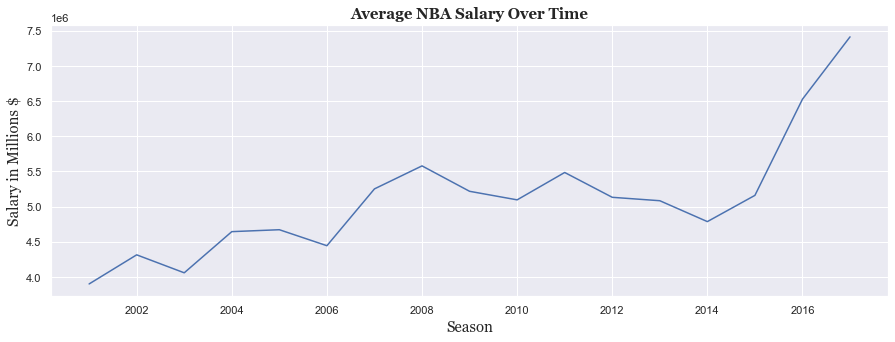

In [11]:
# Plot Average NBA Salary over Time
font = {'fontname': 'Georgia'}
plt.figure(figsize = (15,5))
plt.title('Average NBA Salary Over Time',**font,fontsize = 15,fontweight = 'bold')
plt.plot(agg_df['Season Start'],agg_df['Player Salary'])
plt.xlabel('Season',**font,fontsize = 15)
plt.ylabel('Salary in Millions $',**font,fontsize = 15)



# Lets explore the factors that contribute to salary

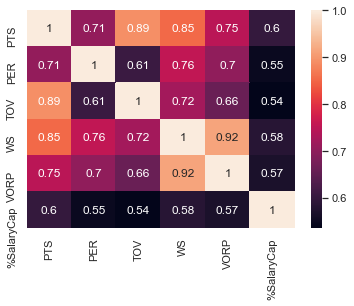

In [12]:
# Create a correlation heatmap to see what features are important to %SalaryCap
cols = ['PTS','PER','TOV','WS','VORP','%SalaryCap']
sns.heatmap(df_00_17[cols].corr(method = 'pearson'),annot = True)

In [13]:
# Import necessary libraries for Machine Learning Workflow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor






In [14]:
# Train Test Split
X = df_00_17[['PTS','PER','TOV','WS','VORP']]
y = df_00_17['%SalaryCap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [15]:
# Linear Regression Attempt
LR = LinearRegression()

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print(LR.score(X_test,y_test))

0.3655327492271574


In [16]:
# Random Foreset Regression Attempt
RF = RandomForestRegressor()

RF.fit(X_train,y_train)
y_pred1 = RF.predict(X_test)
print(RF.score(X_test,y_test))

0.3387516493813635


In [17]:
MSE = sklearn.metrics.mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.06560009981647658

In [28]:
# Create a pipeline 
model = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators= 800,min_samples_split=10,min_samples_leaf=4,max_features='sqrt',max_depth=20,bootstrap=True,random_state = 40))
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MSE:", metrics.mean_squared_error(y_test,pred))

MSE: 0.004250722209731385


In [29]:
# See what types of parameters we can tune for the Random Forest Algorithm
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

# Cross Validation to get model parameters

In [30]:
# Use Randomized Search Cross Validation for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

Num_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_depth = [10,20,30,40,50,60,70,80,90,100,None]
bootstrap = [True, False]
max_features = ['auto','sqrt','log2']
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]




parameters = {'randomforestregressor__max_features': max_features, 'randomforestregressor__n_estimators': Num_estimators,'randomforestregressor__bootstrap': bootstrap,'randomforestregressor__max_depth': max_depth,'randomforestregressor__min_samples_leaf':min_samples_leaf,'randomforestregressor__min_samples_split': min_samples_split }
#Cross Validation

# Uncomment .fit to implement, it's commented out for runtime purposes
rf_clf = RandomizedSearchCV(model, parameters,verbose = 1,n_jobs = -1,cv = 5,random_state=40)#.fit(X_train, y_train)

# Uncomment .fit above to implement, it's commented out for runtime purposes

In [31]:
# Obtain Optimal Parameters
rf_clf.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [32]:
# Obtain Predictions
df_00_17_predictions = model.predict(df_00_17[['PTS','PER','TOV','WS','VORP']])
df_00_17_predictions

array([0.03657786, 0.04932093, 0.0215141 , ..., 0.14085106, 0.14377837,
       0.13563651])

In [33]:
# Create a Predicted Salary Cap% column and calculate the residuals
df_00_17['PredictedSalaryCap%'] = df_00_17_predictions
df_00_17['Residuals'] = df_00_17['%SalaryCap'] - df_00_17['PredictedSalaryCap%']

<ipython-input-33-670fa5c9246e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['PredictedSalaryCap%'] = df_00_17_predictions
<ipython-input-33-670fa5c9246e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['Residuals'] = df_00_17['%SalaryCap'] - df_00_17['PredictedSalaryCap%']


In [36]:
# 10 Most Undervalued Players seasons from 2000-2017
df_00_17.sort_values('Residuals',ascending = True).head(10)

,Season Start,Player Name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,PTS,Salary Cap,Player Salary,%SalaryCap,PredictedSalaryCap%,Residuals
18437,2001,Paul Pierce,SF,23.0,BOS,82.0,82.0,3120.0,22.3,56.3,...,138.0,69.0,262.0,251.0,2071.0,42500000.0,2051271.0,0.048265,0.285730,-0.237464
23717,2001,Vince Carter,SF,24.0,TOR,75.0,75.0,2979.0,25.0,55.1,...,114.0,82.0,167.0,205.0,2070.0,42500000.0,3073032.0,0.072307,0.290381,-0.218074
7335,2005,Dwyane Wade,SG,23.0,MIA,77.0,77.0,2974.0,23.1,56.1,...,121.0,82.0,321.0,230.0,1854.0,49500000.0,3031920.0,0.061251,0.273928,-0.212677
2859,2009,Brandon Roy,SG,24.0,POR,78.0,78.0,2903.0,24.0,57.3,...,88.0,22.0,152.0,127.0,1765.0,57700000.0,3910816.0,0.067778,0.260434,-0.192655
4245,2008,Chris Paul,PG,22.0,NOH,80.0,80.0,3006.0,28.3,57.6,...,217.0,4.0,201.0,185.0,1684.0,58680000.0,4574189.0,0.077951,0.265277,-0.187326
14071,2011,Kevin Love,PF,22.0,MIN,73.0,73.0,2611.0,24.3,59.3,...,45.0,28.0,155.0,148.0,1476.0,58044000.0,4609701.0,0.079417,0.266597,-0.187180
20500,2007,Ruben Patterson,SF,31.0,MIL,81.0,53.0,2508.0,18.5,57.8,...,110.0,25.0,199.0,232.0,1194.0,55630000.0,304897.0,0.005481,0.186991,-0.181510
17579,2017,Myles Turner,C,20.0,IND,81.0,81.0,2541.0,18.5,58.5,...,74.0,173.0,105.0,262.0,1173.0,99093000.0,2569920.0,0.025934,0.199017,-0.173082
16758,2002,Michael Jordan*,SF,38.0,WAS,60.0,53.0,2093.0,20.7,46.8,...,85.0,26.0,162.0,119.0,1375.0,40271000.0,1030000.0,0.025577,0.196511,-0.170934
10107,2016,Isaiah Thomas,PG,26.0,BOS,82.0,79.0,2644.0,21.5,56.2,...,91.0,9.0,220.0,167.0,1823.0,94143000.0,6587132.0,0.069969,0.240697,-0.170728


In [35]:
# 10 Most Overvalued Player seasons from 2000-2017
df_00_17.sort_values('Residuals',ascending = True).tail(10)

,Season Start,Player Name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,PTS,Salary Cap,Player Salary,%SalaryCap,PredictedSalaryCap%,Residuals
13391,2002,Juwan Howard,PF,28.0,TOT,81.0,72.0,2635.0,15.8,51.3,...,46.0,47.0,152.0,265.0,1185.0,40271000.0,20625000.0,0.512155,0.214505,0.297650
21019,2002,Scottie Pippen*,SF,36.0,POR,62.0,60.0,1996.0,14.9,49.7,...,101.0,35.0,171.0,162.0,659.0,40271000.0,19727524.0,0.489869,0.184820,0.305049
19144,2011,Rashard Lewis,PF,31.0,ORL,25.0,25.0,810.0,11.0,52.4,...,22.0,10.0,35.0,63.0,304.0,58044000.0,21136631.0,0.364148,0.052716,0.311432
4293,2005,Chris Webber,PF,31.0,PHI,21.0,21.0,702.0,13.1,42.3,...,26.0,19.0,49.0,70.0,328.0,49500000.0,19125000.0,0.386364,0.069314,0.317049
13393,2002,Juwan Howard,PF,28.0,DEN,28.0,28.0,976.0,17.1,51.5,...,18.0,17.0,74.0,95.0,501.0,40271000.0,20625000.0,0.512155,0.191714,0.320441
524,2004,Allan Houston,SG,32.0,NYK,50.0,50.0,1799.0,14.8,53.9,...,38.0,2.0,102.0,105.0,924.0,43870000.0,17531250.0,0.399618,0.078020,0.321599
23222,2009,Tracy McGrady,SG,29.0,HOU,35.0,35.0,1181.0,16.3,49.2,...,42.0,15.0,69.0,38.0,545.0,57700000.0,23239562.0,0.402765,0.079804,0.322962
14339,2014,Kobe Bryant,SG,35.0,LAL,6.0,6.0,177.0,10.7,50.5,...,7.0,1.0,34.0,9.0,83.0,63065000.0,23500000.0,0.372631,0.040707,0.331925
13392,2002,Juwan Howard,PF,28.0,DAL,53.0,44.0,1659.0,15.1,51.1,...,28.0,30.0,78.0,170.0,684.0,40271000.0,20625000.0,0.512155,0.167405,0.344750
13390,2001,Juwan Howard,PF,27.0,DAL,27.0,27.0,993.0,16.6,53.8,...,29.0,16.0,73.0,106.0,481.0,42500000.0,18750000.0,0.441176,0.068932,0.372244
